Customer Segmentation Clustering Project

This script segments customers based on their annual income and spending score.
Business Questions Addressed:
1. Who are my customers?
2. What are the spending behaviors?
3. How should I tailor my marketing strategy?
4. Which customers are most profitable?
5. How can I improve product or service offerings?
6. How do customers behave differently?
7. What are the future growth opportunities?




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.
Data Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17  

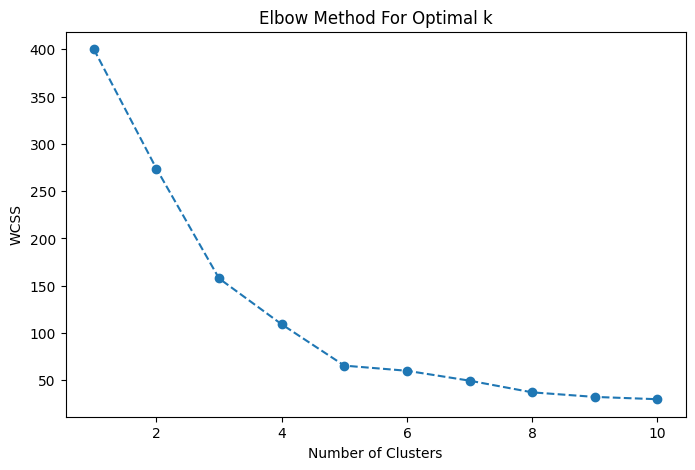

For n_clusters = 2, the silhouette score is 0.397
For n_clusters = 3, the silhouette score is 0.467
For n_clusters = 4, the silhouette score is 0.494
For n_clusters = 5, the silhouette score is 0.555
For n_clusters = 6, the silhouette score is 0.514
For n_clusters = 7, the silhouette score is 0.502
For n_clusters = 8, the silhouette score is 0.455
For n_clusters = 9, the silhouette score is 0.457
For n_clusters = 10, the silhouette score is 0.445

Data with Cluster Labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

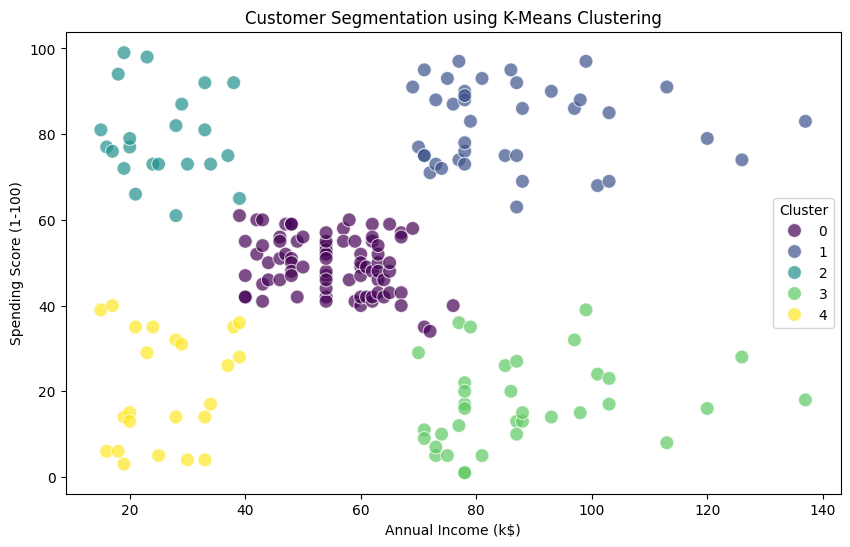


Cluster Centers (Original Scale):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [3]:

%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



data = pd.read_csv("C:/Users/alhus/Downloads/archive (9)/Mall_Customers.csv")
print("Data Head:")
print(data.head())

data_numeric = data[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nMissing values in numeric data:")
print(data_numeric.isnull().sum())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the silhouette score is {silhouette_avg:.3f}")

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

print("\nData with Cluster Labels:")
print(data.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=data,
    s=100,
    alpha=0.7
)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("\nCluster Centers (Original Scale):")
print(centers_df)


Who are my customers?
The clustering groups customers into distinct segments based on their income and spending score. Each cluster represents a unique profile, such as high-income high-spenders or low-income low-spenders. This segmentation provides a clear picture of different customer types.

What are the spending behaviors?
Spending behavior is measured by the spending score, which indicates how actively customers spend. Clusters with high spending scores represent more active spenders, while lower scores suggest conservative spending. This differentiation helps in understanding varied expenditure habits.

How should I tailor my marketing strategy?
Marketing strategies can be customized based on the unique characteristics of each customer segment. High-spending clusters might be targeted with premium offers, while budget-conscious groups could benefit from discounts. This data-driven approach ensures more effective, personalized campaigns.

Which customers are most profitable?
Customers with a combination of high annual income and high spending scores are likely the most profitable. These clusters generate higher revenue and thus represent key targets for marketing efforts. Focusing on them can maximize overall profitability.

How can I improve product or service offerings?
The distinct needs and preferences of each cluster suggest targeted product or service improvements. For example, premium offerings can be designed for high-income high-spenders, while value-based options suit other segments. This approach ensures offerings are aligned with customer demands.

How do customers behave differently?
Customers differ primarily in their income levels and spending scores, leading to distinct clusters. Some groups spend more actively irrespective of income, while others are more conservative. Recognizing these differences aids in developing tailored business strategies.

What are the future growth opportunities?
Future growth can be achieved by targeting under-served segments and optimizing offers for clusters with potential to increase spending. Analyzing cluster profiles helps identify niches for new products or services. This strategic focus can drive revenue expansion and market growth.